In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def restriccion1(theta): #no hay superposicion
    w, h, alpha = theta[0], theta[1], theta[2]
    return ((h / np.tan(alpha))) - w

def restriccion2(theta): # largo cabe en cubesat
    nh, w, alpha = theta[4], theta[0], theta[2]
    return 200 - (nh * np.sqrt(2 * (1 - np.cos(np.pi - 2 * alpha))) * w + w + w * np.cos(alpha))
   
def restriccion3(theta): #ancho cabe en cubesat
    w,h,alpha=theta[0],theta[1],theta[2]
    return w*np.sqrt(2*(1+np.cos(2*alpha)))-(h/np.sin(alpha))

def restriccion4(theta):  #alto cabe en cubesat
    w, alpha = theta[0], theta[2]
    return 100 - w * np.sin(alpha)

def restriccion5(theta): #para que no hayan separaciones al momento de plegar
    w,h=theta[0],theta[1]
    return h-w

def restriccion6(theta): #alpha no puede ser 90°
    alpha = theta[2]
    return np.pi/2 - alpha

def restriccion7(theta): #alto expandido es menor a 300
    w, h, nv, nh, alpha = theta[0], theta[1], theta[3], theta[4], theta[2]
    return 300 - 2*h*nv

resultado_por_iteracion = []

def objetivo(theta):
    w, h, alpha, nv, nh = theta[0], theta[1], theta[2], theta[3], theta[4]
    # Calcular d en función de h y alpha
    d = h / np.tan(alpha)
    
    # Cálculo del área plegada
    area_plegada = (w * h / (h**2 + d**2)) * (d**2 + (2 * w * nh - 3 * w) * d + h**2)
    resultado_final= - np.sqrt(20*(((w) * (h)*nv*nh )))+(5*np.sqrt(area_plegada))
    resultado_por_iteracion.append(resultado_final)
    return resultado_final

    
# Definición de las restricciones no lineales
non_linear_constraint1 = opt.NonlinearConstraint(restriccion1, 0, np.inf)
non_linear_constraint2 = opt.NonlinearConstraint(restriccion2, 0, np.inf)
non_linear_constraint3 = opt.NonlinearConstraint(restriccion3, 0, np.inf)
non_linear_constraint4 = opt.NonlinearConstraint(restriccion4, 0, np.inf)
non_linear_constraint5 = opt.NonlinearConstraint(restriccion5, 0, np.inf)
non_linear_constraint7 = opt.NonlinearConstraint(restriccion7, 0, np.inf)

# Límites inferiores y superiores para los parámetros
lower_bounds = [30, 10, np.deg2rad(30), 1, 1]  # Los límites inferiores para w, h, alpha, nv y nh
upper_bounds = [100, 100, np.deg2rad(80), 19, 100]  # Los límites superiores para w, h, alpha, nv y nh
bounds = opt.Bounds(lower_bounds, upper_bounds)

# Punto inicial para la optimización
theta_inicial = [50, 50, np.deg2rad(60), 30, 30]

# Llamada a la función de optimización
resultado = opt.minimize(objetivo, theta_inicial, bounds=bounds, constraints=[non_linear_constraint1,non_linear_constraint2, non_linear_constraint3, non_linear_constraint4, non_linear_constraint5, non_linear_constraint7], method='SLSQP')
# Resultados
print("Resultado de la optimización:")
print("w =", resultado.x[0])
print("h =", resultado.x[1])
print("alpha =", np.degrees(resultado.x[2]))  
print("nv =", resultado.x[3])
print("nh =", resultado.x[4])
print("Valor de la función objetivo =", resultado.fun)
print("Número de iteraciones:", resultado.nit)
print("d", resultado.x[1] / np.tan(resultado.x[2]))
print("largo plegado", (resultado.x[4] * resultado.x[0] * np.sqrt(2 * (1 - np.cos(np.pi - 2 * resultado.x[2]))) + resultado.x[0]))
print("largo superposicion", (resultado.x[1]/np.sin(resultado.x[2])-resultado.x[0]*np.sqrt(2*(1-np.cos(np.pi-2*resultado.x[2])))))

Resultado de la optimización:
w = 30.0
h = 30.00000000019689
alpha = 45.00000001971778
nv = 4.999999999726753
nh = 3.5069384285750966
Valor de la función objetivo = -301.6967540876753
Número de iteraciones: 7
d 29.99999997954848
largo plegado 178.78679659174523
largo superposicion 2.7844748728966806e-10


In [3]:
def calcular_largo_superposicion(w,alpha, h):
    largo_superposicion = h/np.sin(np.deg2rad(alpha)) -w *np.sqrt(2 * (1 - np.cos(np.pi - 2 * np.deg2rad(alpha))))
    return largo_superposicion


In [4]:
calcular_largo_superposicion(32.14,50.7, 37.33)

7.526210675607352

In [5]:
restriccion2(resultado.x)

-2.0041341031173943e-08

In [6]:
print(resultado.status)
print(resultado.message)
print(resultado.success)

0
Optimization terminated successfully
True


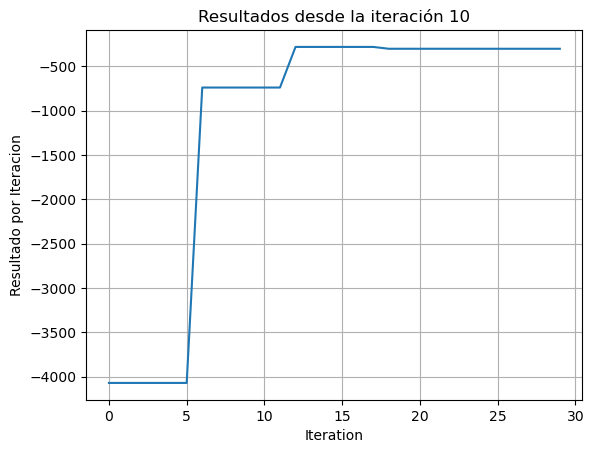

In [7]:
iteration = range(0, len(resultado_por_iteracion))

# Plot resultado_por_iteracion vs iteration
plt.plot(iteration, resultado_por_iteracion[0:])
plt.xlabel('Iteration')
plt.ylabel('Resultado por Iteracion')
plt.title('Resultados desde la iteración 10')
plt.grid(True)
plt.show()


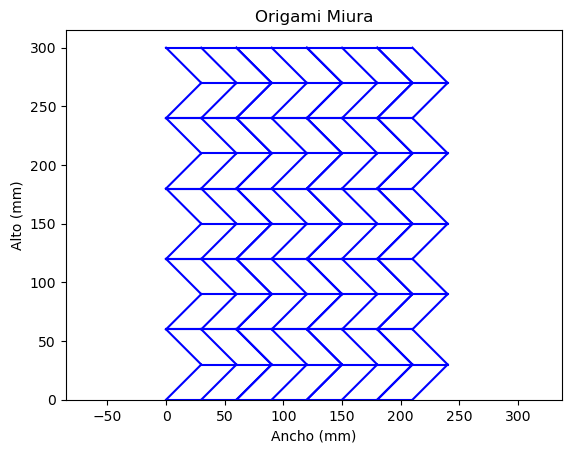

In [8]:
from miura_drawer import miura_drawer
miura_drawer(resultado.x[0], resultado.x[1], resultado.x[2], resultado.x[3], resultado.x[4])

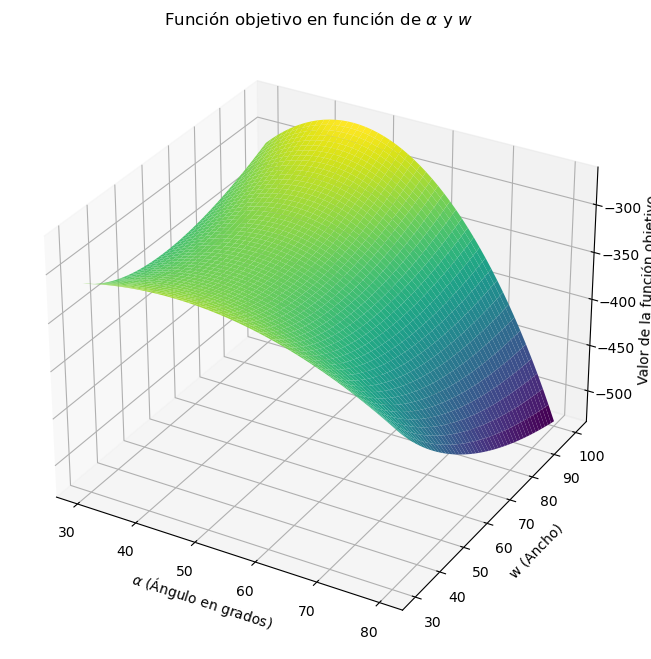

In [9]:
nh_fijo=3.5
nv_fijo=5
h_fijo=30

alpha_values = np.linspace(np.deg2rad(30), np.deg2rad(80), 50)
w_values = np.linspace(30, 100, 50)
Alpha, W = np.meshgrid(alpha_values, w_values)

z=np.zeros_like(Alpha)
for i in range(Alpha.shape[0]):
    for j in range(Alpha.shape[1]):
        z[i,j]=objetivo([W[i,j], h_fijo, Alpha[i,j], nv_fijo, nh_fijo])

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface( np.rad2deg(Alpha), W, z, cmap='viridis')

ax.set_ylabel('w (Ancho)')
ax.set_xlabel(r'$\alpha$ (Ángulo en grados)')
ax.set_zlabel('Valor de la función objetivo')

plt.title('Función objetivo en función de $\\alpha$ y $w$')
plt.show()

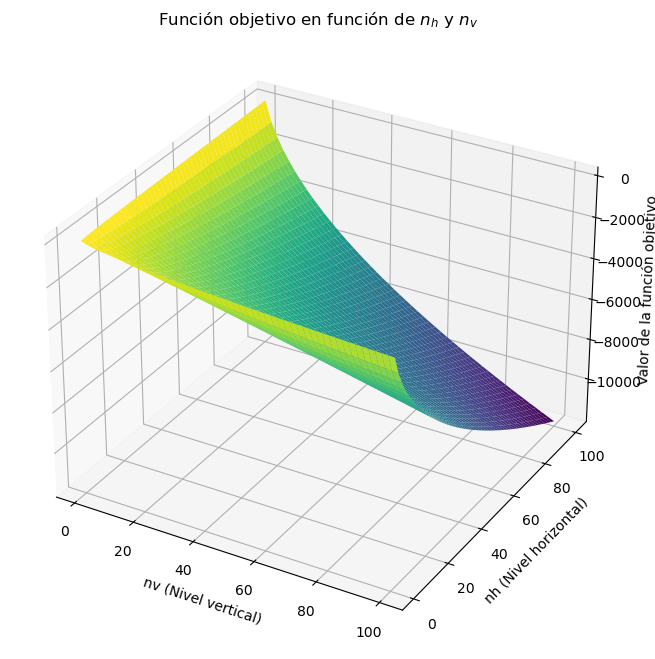

In [10]:
# Definir los parámetros fijos
w_fijo = 30
alpha_fijo = np.deg2rad(45)
h_fijo = 30

# Crear una malla para nh y nv
nh_values = np.linspace(1, 100, 50)
nv_values = np.linspace(1, 100, 50)
NH, NV = np.meshgrid(nh_values, nv_values)

# Calcular los valores de la función objetivo
z = np.zeros_like(NH)

for i in range(NH.shape[0]):
    for j in range(NH.shape[1]):
        z[i, j] = objetivo([w_fijo, h_fijo, alpha_fijo, NV[i, j], NH[i, j]])

# Crear el gráfico 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(NV, NH, z, cmap='viridis')

ax.set_ylabel('nh (Nivel horizontal)')
ax.set_xlabel('nv (Nivel vertical)')
ax.set_zlabel('Valor de la función objetivo')

plt.title('Función objetivo en función de $n_h$ y $n_v$')
plt.show()

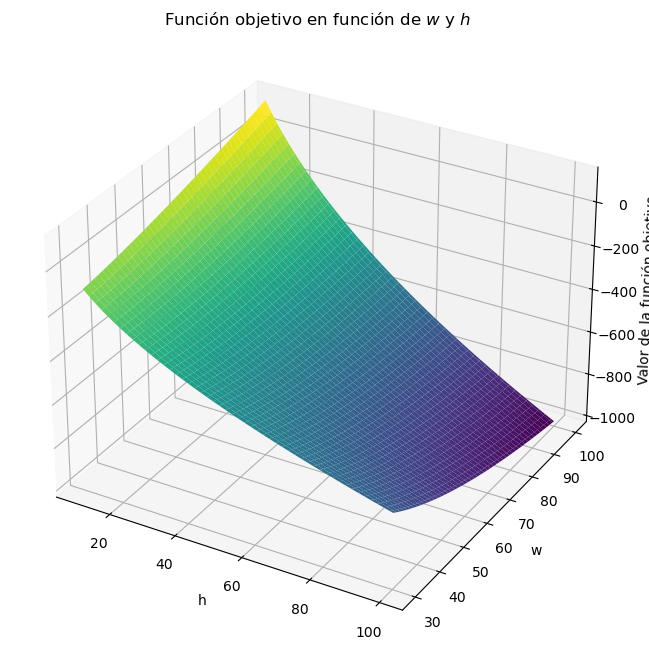

In [11]:
alpha_fijo = np.deg2rad(45)
nh_fijo = 3.5
nv_fijo = 5

# Crear una malla para nh y nv
h_values = np.linspace(10, 100, 100)
w_values = np.linspace(30, 100, 100)
H, W = np.meshgrid(h_values, w_values)

# Calcular los valores de la función objetivo
z = np.zeros_like(H)

for i in range(H.shape[0]):
    for j in range(H.shape[1]):
        z[i, j] = objetivo([W[i, j], H[i, j], alpha_fijo, nv_fijo, nh_fijo])

# Crear el gráfico 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Swap H and W in the plot_surface function
ax.plot_surface(H, W, z, cmap='viridis')

# Adjust the axis labels accordingly
ax.set_xlabel('h')
ax.set_ylabel('w')
ax.set_zlabel('Valor de la función objetivo')

plt.title('Función objetivo en función de $w$ y $h$')
plt.show()

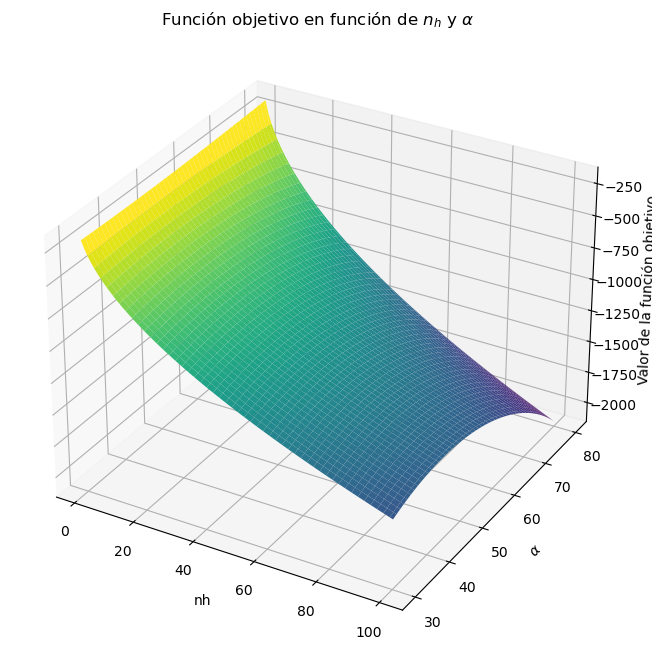

In [12]:
w_fijo = 30
nv_fijo = 5
h_fijo = 30


# Crear una malla para nh y nv
alpha_values = np.linspace(np.deg2rad(30), np.deg2rad(80), 100)
nh_values = np.linspace(1, 100, 100)
Alpha, NH = np.meshgrid(alpha_values, nh_values)

# Calcular los valores de la función objetivo
z = np.zeros_like(Alpha)

for i in range(Alpha.shape[0]):
    for j in range(Alpha.shape[1]):
        #z[i, j] = objetivo([w_fijo, h_fijo, Alpha[i, j], nv_fijo, NH[i, j]])
        z[i, j] = objetivo([w_fijo, h_fijo, Alpha[i, j], nv_fijo, NH[i, j]])


# Crear el gráfico 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Swap H and W in the plot_surface function
ax.plot_surface(NH, np.rad2deg(Alpha), z, cmap='viridis')

# Adjust the axis labels accordingly
ax.set_ylabel(r'$\alpha$')   
ax.set_xlabel('nh')
ax.set_zlabel('Valor de la función objetivo')

plt.title('Función objetivo en función de $n_h$ y $\\alpha$')
plt.show()

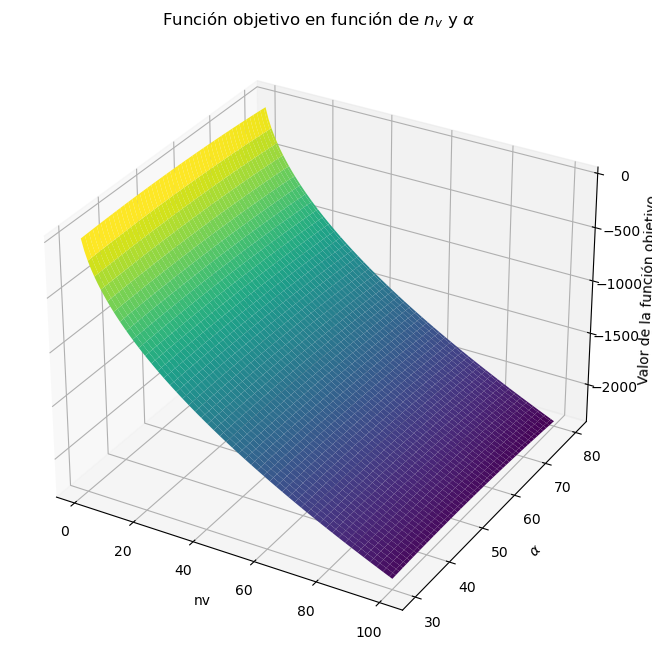

In [13]:
w_fijo = 30
nh_fijo = 3.5
h_fijo = 30

# Crear una malla para nh y nv
alpha_values = np.linspace(np.deg2rad(30), np.deg2rad(80), 100)
nv_values = np.linspace(1, 100, 100)
Alpha, NV = np.meshgrid(alpha_values, nv_values)

# Calcular los valores de la función objetivo
z = np.zeros_like(Alpha)

for i in range(Alpha.shape[0]):
    for j in range(Alpha.shape[1]):
        z[i, j] = objetivo([w_fijo, h_fijo, Alpha[i, j], NV[i, j], nh_fijo])

# Crear el gráfico 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Swap H and W in the plot_surface function
ax.plot_surface(NV,np.rad2deg(Alpha), z, cmap='viridis')

# Adjust the axis labels accordingly
ax.set_xlabel('nv')
ax.set_ylabel(r'$\alpha$')
ax.set_zlabel('Valor de la función objetivo')

plt.title('Función objetivo en función de $n_v$ y $\\alpha$')
plt.show()